In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.svm import SVR

In [22]:
df = pd.read_csv('../data/clean_bls_bea_v1.csv')
df.columns

Index(['year', 'CPI_yoy', 'Unemployment', 'Hourly earnings_yoy', 'Shelter_yoy',
       'Energy_yoy', 'Medical Care_yoy', 'Food_yoy', 'Gasoline_yoy',
       'Imports_yoy', 'New & Used Vehicles_yoy',
       'All Items Less Food & Shelter_yoy', 'month', 'yearMonth',
       'Chained (2017) dollars', 'Compensation of employees',
       'Current dollars', 'Disposable personal income, chained (2017) dollars',
       'Disposable personal income, current dollars',
       'Employer contributions for employee pension and insurance funds',
       'Employer contributions for government social insurance',
       'Equals: Disposable personal income', 'Equals: Personal saving', 'Farm',
       'Government', 'Government social benefits to persons',
       'Less: Contributions for government social insurance, domestic',
       'Less: Personal current taxes', 'Less: Personal outlays', 'Medicaid',
       'Medicare', 'Nonfarm', 'Other',
       'Other current transfer receipts, from business (net)',
       '

In [ ]:
what_are_these = ['Unemployment insurance', 'To the rest of the world (net)', 'Supplements to wages and salaries', 'Social security', 
         'Personal income excluding current transfer receipts, Billions of chained (2017) dollars',
       'Personal income receipts on assets', 'Personal interest income', 'Personal current transfer payments',
       'Personal current transfer receipts', 'Personal dividend income', 'Personal consumption expenditures',
       'Nonfarm', 'Other current transfer receipts, from business (net)','Less: Contributions for government social insurance, domestic',
       'Less: Personal current taxes', 'Less: Personal outlays',

In [3]:
df.describe()

,year,CPI_yoy,Unemployment,Hourly earnings_yoy,Shelter_yoy,Energy_yoy,Medical Care_yoy,Food_yoy,Gasoline_yoy,Imports_yoy,...,Proprietors' income with inventory valuation and capital consumption adjustments,Rental income of persons with capital consumption adjustment,Social security,Supplements to wages and salaries,To government,To the rest of the world (net),"Total, Billions of chained (2017) dollars",Unemployment insurance,Veterans' benefits,Wages and salaries
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02
mean,2010.000000,2.109406,5.982018,2.490742,2.659880,3.679351,3.472716,2.306048,5.047073,1.455208,...,1.158891e+12,4.198433e+11,6.958038e+11,1.588553e+12,8.324202e+10,6.476187e+10,1.267991e+13,5.419364e+10,6.533912e+10,6.768607e+12
std,5.489277,1.246932,1.800852,0.456653,1.071533,12.295927,0.931914,1.430317,20.259625,7.108459,...,2.285332e+11,1.881789e+11,1.870911e+11,2.924023e+11,1.720227e+10,1.736249e+10,1.485408e+12,3.531001e+10,3.201599e+10,1.278564e+12
min,2001.000000,-2.097161,3.500000,1.551724,-0.649093,-28.093208,1.482400,-0.678403,-44.072848,-19.118644,...,8.018280e+11,1.608600e+11,4.192080e+11,1.065876e+12,5.118800e+10,3.733000e+10,1.021174e+13,2.367600e+10,2.598000e+10,4.930166e+12
25%,2005.000000,1.500233,4.700000,2.161281,2.233363,-3.845336,2.777553,1.386597,-6.796211,-1.955965,...,9.603380e+11,2.219818e+11,5.148892e+11,1.391523e+12,7.260975e+10,4.755100e+10,1.148227e+13,3.120150e+10,3.670300e+10,5.787418e+12
50%,2010.000000,2.066441,5.500000,2.442632,2.924116,4.204983,3.527729,2.123471,5.698490,1.490939,...,1.117243e+12,4.365065e+11,6.902795e+11,1.555346e+12,8.081050e+10,6.541850e+10,1.257205e+13,3.490900e+10,5.789450e+10,6.535754e+12
75%,2015.000000,2.871211,7.200000,2.664786,3.374308,12.364900,4.266299,3.169936,19.112771,5.734448,...,1.353050e+12,6.009265e+11,8.651270e+11,1.824674e+12,9.800600e+10,7.899475e+10,1.384353e+13,6.361600e+10,9.126075e+10,7.775447e+12
max,2019.000000,5.600123,10.000000,3.637222,4.303797,34.802333,5.189918,6.288752,55.180580,21.399177,...,1.605775e+12,7.216680e+11,1.045621e+12,2.144645e+12,1.149990e+11,9.730900e+10,1.577824e+13,1.613540e+11,1.381160e+11,9.499575e+12


In [4]:
df.corr(numeric_only=True)['CPI_yoy'].sort_values(ascending=False)

CPI_yoy                                                                                    1.000000
Energy_yoy                                                                                 0.915681
Imports_yoy                                                                                0.871509
Gasoline_yoy                                                                               0.846785
Food_yoy                                                                                   0.420022
Medical Care_yoy                                                                           0.335528
All Items Less Food & Shelter_yoy                                                          0.315674
New & Used Vehicles_yoy                                                                    0.141248
Shelter_yoy                                                                                0.138209
Personal outlays, current dollars                                                          0.090223


In [5]:
df.corr(numeric_only=True)['CPI_yoy'].sort_values(ascending=False)

CPI_yoy                                                                                    1.000000
Energy_yoy                                                                                 0.915681
Imports_yoy                                                                                0.871509
Gasoline_yoy                                                                               0.846785
Food_yoy                                                                                   0.420022
Medical Care_yoy                                                                           0.335528
All Items Less Food & Shelter_yoy                                                          0.315674
New & Used Vehicles_yoy                                                                    0.141248
Shelter_yoy                                                                                0.138209
Personal outlays, current dollars                                                          0.090223


In [23]:
lr = LinearRegression()
X = df[[
    "Personal consumption expenditures",
    "Personal interest payments",
    "Personal current transfer payments",
    "To government",
    "Population (midperiod, thousands)",
    "Veterans' benefits",
    "Medicare",
    "Medicaid",
    "Employer contributions for employee pension and insurance funds",
    "Employer contributions for government social insurance",
    "Unemployment insurance",
    "Personal income receipts on assets",
    "Personal interest income",
    "Personal dividend income",
    "Social security",
    "Government social benefits to persons",
    "Compensation of employees",
    "Rental income of persons with capital consumption adjustment",
    'Unemployment', 'Hourly earnings_yoy', 'Shelter_yoy',
    'Energy_yoy', 'Medical Care_yoy', 'Food_yoy', 'Gasoline_yoy',
    'Imports_yoy', 'New & Used Vehicles_yoy', 'Population (midperiod, thousands)',
    'To the rest of the world (net)', 
    'Less: Contributions for government social insurance, domestic',
    'Less: Personal current taxes', 'Less: Personal outlays'
]]

y_saving_ratio = df['Personal saving as a percentage of disposable personal income']
y_saving = df['Equals: Personal saving']
y_disp_inc = df['Disposable personal income, current dollars']

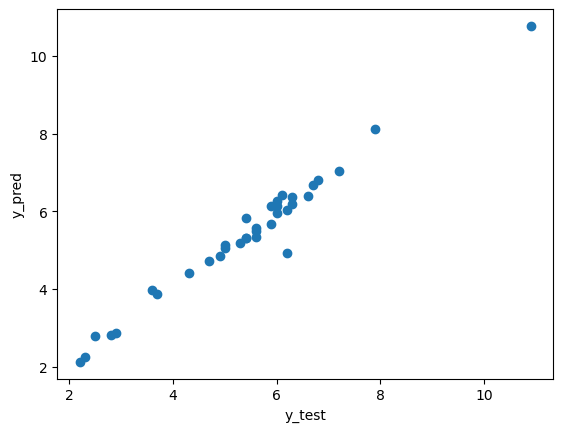

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_saving_ratio, random_state=42, test_size=0.15)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


In [27]:
print(f"Train cv: {cross_val_score(lr, X_train, y_train, cv = 10).mean()}")
print(f"Train r2: {lr.score(X_train, y_train)}")
print(f"Test r2: {lr.score(X_test, y_test)}")

Train cv: 0.972907802140693
Train r2: 0.9845941777252735
Test r2: 0.972560953086523


In [14]:
coef_flat = lr.coef_.flatten() if lr.coef_.ndim > 1 else lr.coef_

coef_df = pd.DataFrame(coef_flat, index=X.columns, columns=['Coefficient'])

print(coef_df)

                                                     Coefficient
Personal consumption expenditures                  -83855.370318
Personal interest payments                          -1508.826692
Personal current transfer payments                    829.791432
To government                                       -1088.946846
Population (midperiod, thousands)                       0.602639
Veterans' benefits                                      0.511948
Medicare                                                2.290880
Medicaid                                               -0.765057
Employer contributions for employee pension and...      0.476738
Employer contributions for government social in...      0.554307
Unemployment insurance                                 -0.144522
Personal income receipts on assets                   4286.383621
Personal interest income                            -1704.476171
Personal dividend income                            -2680.510351
Social security          

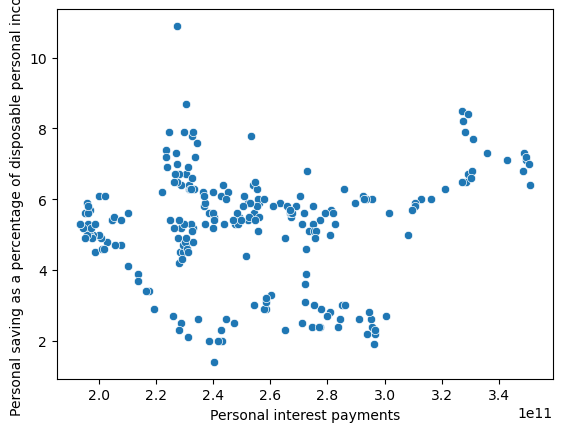

In [34]:
sns.scatterplot(x="Personal interest payments", y="Personal saving as a percentage of disposable personal income", data=df);

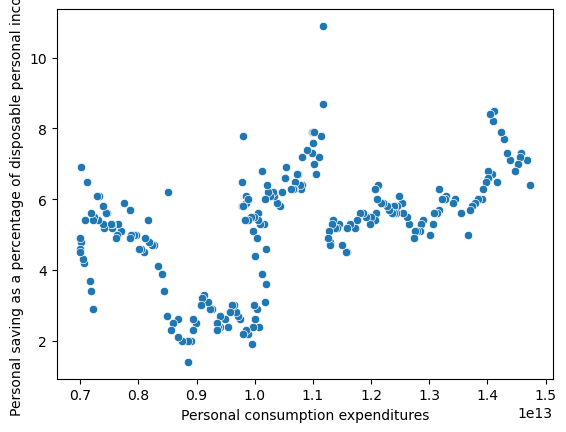

In [32]:
sns.scatterplot(x="Personal consumption expenditures", y="Personal saving as a percentage of disposable personal income", data=df);

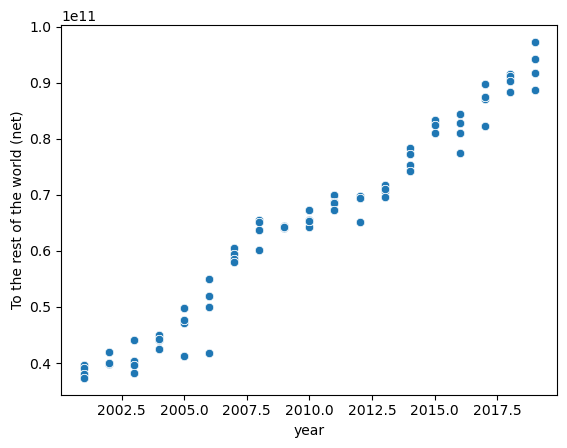

In [30]:
sns.scatterplot(x="year", y="To the rest of the world (net)", data=df);